# Contents
- [Importing Libraries](#Importing-Libraries)
- [Exploratory Data Analysis](#EDA)
    - [Explore Dataframe](##Exploring-Dataframe)
    - [Handling Missing Values](#Missing-Values)
        - [Handling NaN Values](#Handling-NaN-values)
    - [Merge two attriubes]()
    - [World Cloud](#World-Cloud)
- [Train Validate Test](#Train,-Validate-and-Test) 
 
- [Navie Bayes Model](##Navie-Bayes-Model)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("dataset-with-replacement.csv")

## EDA
Exploratory Data Analysis includes data exploration, handling missing values.

### Exploring Dataframe

In [3]:
df.head(6)

,Unnamed: 0,title,text,label
0,0,IT’S CHRISTMAS IN OCTOBER: American Debt Is $1...,This one sentence should scare every taxpaying...,Real
1,1,High School Forced to Change Mascot over Accus...,A school district in Kentucky has canceled the...,Fake
2,2,Vanguard CEO 'encouraged' by efforts to revise...,(Reuters) - Vanguard Group Chief Executive Bil...,Fake
3,3,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,Real
4,4,I’m Running Out of Popcorn – Harvey Organ,Let us have a look at the data for today \n. \...,Real
5,5,5 Reasons The Republicans Just Nominated The ...,Donald Trump has cleared the Republican presid...,Real


In [4]:
df.shape

(18033, 4)

In [5]:
df.describe()

,Unnamed: 0
count,18033.000000
mean,9016.000000
std,5205.823038
min,0.000000
25%,4508.000000
50%,9016.000000
75%,13524.000000
max,18032.000000


In [6]:
# title attribute of first instance/tuple/row.
df.head(1).title

0    IT’S CHRISTMAS IN OCTOBER: American Debt Is $1...
Name: title, dtype: object

In [7]:
df.loc[4, 'title']

'I’m Running Out of Popcorn – Harvey Organ'

In [8]:
# get full information of that tuple.
df.loc[4, 'text']

'Let us have a look at the data for today \n. \n\nIn silver, the total open interest ROSE by 318 contracts UP to 193,975. The open interest ROSE AS the silver price was UP 8 cents in yesterday’s trading .In ounces, the OI is still represented by just less THAN 1 BILLION oz i.e. .970 BILLION TO BE EXACT or 139% of annual global silver production (ex Russia &ex China). \nIn silver for October we finished with 39 notices served upon for 195,000 oz. Thus the final standings for silver in October is 555 notices served upon for 2,775,000 oz. An excellent showing for silver in a non delivery month. \nIn November, in silver, on first day notice filings: 875 notices were served upon for 1,690,000 oz \nI \nIn gold, the total comex gold ROSE by 2,919 contracts WITH THE RISE in price of gold ($4.30 ON FRIDAY ) . The total gold OI stands at 510,070 contracts. \nIn gold for October we had 341 notices served upon for 341,000 oz. This should finalize gold as the total number of notices filed for the m

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18033 entries, 0 to 18032
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18033 non-null  int64 
 1   title       17906 non-null  object
 2   text        18024 non-null  object
 3   label       18033 non-null  object
dtypes: int64(1), object(3)
memory usage: 563.7+ KB


**label** attribute is target attribute. <br />
0: Fake news <br />
1: Real news

In [10]:
df['label'].value_counts()

label
Real    9287
Fake    8746
Name: count, dtype: int64

In [11]:
# Replace 1 and 0 by Real and Fake (news).

df['label'] = df['label'].replace({1: 'Real', 0: 'Fake'})

In [12]:
df['label'].value_counts()

label
Real    9287
Fake    8746
Name: count, dtype: int64

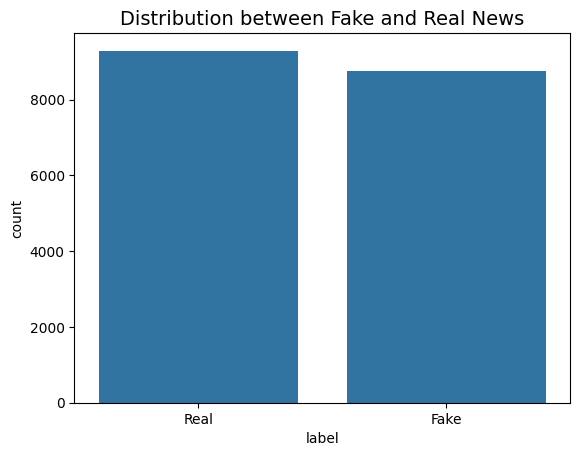

In [13]:
class_names = ['Fake', 'Real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution between Fake and Real News',fontsize =14)
plt.show()

**Unnamed: 0** attribute is just like index so drop this attribute

In [14]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [15]:
df.sample(4)

,title,text,label
9168,JUDICIAL WATCH INVESTIGATOR: Here’s why we’re ...,Chris Farrell is the Judicial Watch Director o...,Real
12252,Biden and Trump Agree to Fight Pistol Duel--Fi...,"Thursday, 27 October 2016 Biden and Trump to D...",Real
5439,BREAKING: VIDEO OF YOUNG OBAMA EMERGES Discuss...,Who needs family when you have a neighborhood ...,Real
9613,North Korea pledges 'powerful counter measures...,"VLADIVOSTOK, Russia (Reuters) - North Korea on...",Fake


### Missing Values

In [16]:
df.isnull().sum()

title    127
text       9
label      0
dtype: int64

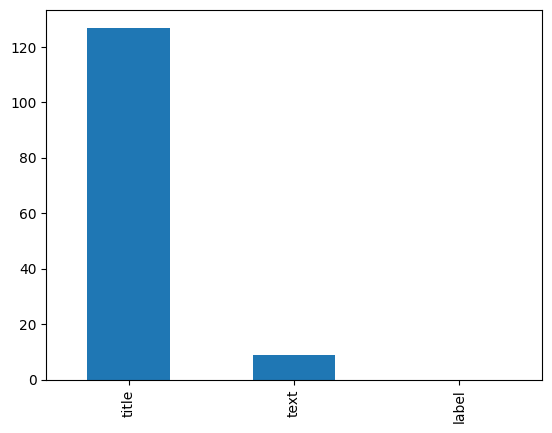

In [17]:
df.isnull().sum().plot(kind='bar')
plt.show()

In [18]:
# List of attributes to check for missing values
attributes = ['title', 'text', 'label']

# Calculate the percentage of missing values for each attribute
for attribute in attributes:
    percentage = df[attribute].isnull().mean() * 100
    print(f'{attribute} = {percentage:.2f}%')

title = 0.70%
text = 0.05%
label = 0.00%



*title* attriubute got >1% of missing values.

In [19]:
# view null rows
null_rows = df[df.isnull().any(axis=1)]
#null_rows

In [20]:
# view null rows of 'text' attribute
null_rows_text = df[df['text'].isnull()]
#null_rows_text

#### Findings 
NaN is present in 'title' and 'text' attribute of Real news

#### Handling NaN values 

In [21]:
# filling NaN values with '' empty string
df = df.fillna('')

In [22]:
# view null rows
df[df.isnull().any(axis=1)]

# No NaN values present.

,title,text,label


In [23]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [24]:
df.nunique()

title    15292
text     15258
label        2
dtype: int64

### Merging 'title' and 'text' attribute

In [25]:
df['content'] = df['title'] + df['text']
df['length'] = df['content'].apply(lambda x: len(x) - x.count(' '))

In [26]:
df.head(6)

,title,text,label,content,length
0,IT’S CHRISTMAS IN OCTOBER: American Debt Is $1...,This one sentence should scare every taxpaying...,Real,IT’S CHRISTMAS IN OCTOBER: American Debt Is $1...,1872
1,High School Forced to Change Mascot over Accus...,A school district in Kentucky has canceled the...,Fake,High School Forced to Change Mascot over Accus...,2359
2,Vanguard CEO 'encouraged' by efforts to revise...,(Reuters) - Vanguard Group Chief Executive Bil...,Fake,Vanguard CEO 'encouraged' by efforts to revise...,1585
3,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,Real,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,63
4,I’m Running Out of Popcorn – Harvey Organ,Let us have a look at the data for today \n. \...,Real,I’m Running Out of Popcorn – Harvey OrganLet u...,2790
5,5 Reasons The Republicans Just Nominated The ...,Donald Trump has cleared the Republican presid...,Real,5 Reasons The Republicans Just Nominated The ...,3397


In [27]:
# Construct new df with selected attributes.
# new_attributes = ['label', 'words_count']
# new_df = pd.DataFrame(df[new_attributes])

In [28]:
# new_df.head(4)

In [29]:
# words_in_label = df.groupby('label')['length'].sum().reset_index()
# words_in_label

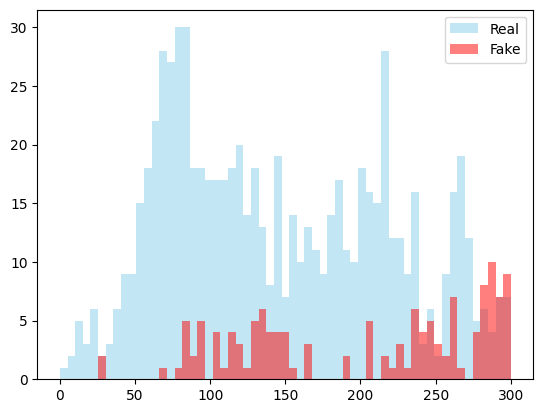

In [30]:
bins = np.linspace(0, 300, 60)
plt.hist(df[df['label']=='Real']['length'], bins, alpha=0.5, label='Real', color='skyblue')
plt.hist(df[df['label']=='Fake']['length'], bins, alpha=0.5, label='Fake', color='red')
plt.legend()
plt.show()

#### Findings
Content of Fake news is smaller than Real news

## World Cloud

Word Cloud of 'title' in dataset.
Data Exploration

In [31]:
def generate_worldcloud(df, attribute):
    attributes = ' '.join(attribute for attribute in df[attribute])
    wordcloud = WordCloud(
        background_color='white', 
        max_words=400,
        width=800, 
        height=600
    ).generate(attributes)

    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

World cloud of title of real dataset


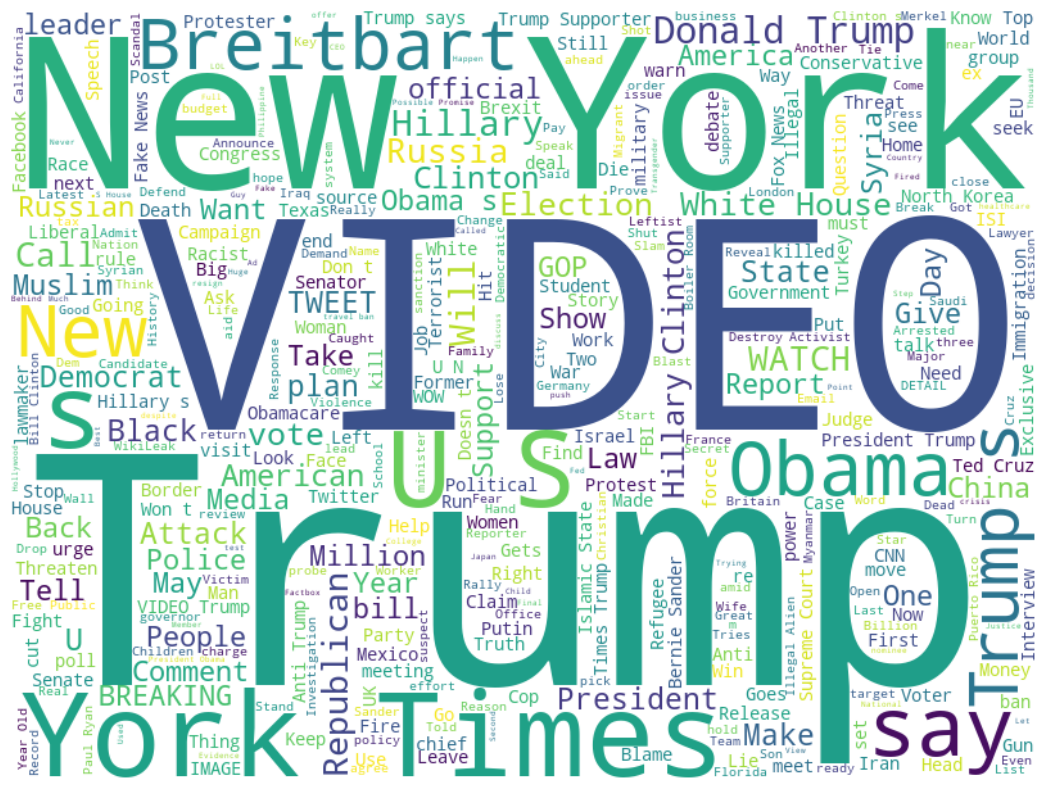

In [32]:
attribute = df.columns[0]      # title
#print(attribute)
print("World cloud of title of real dataset")
generate_worldcloud(df, attribute)

## Train, Validate and Test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Independent variables: 'title' and 'text'
# X = df.loc[:, df.columns != 'label']
# X = df[['title', 'text']]
# X.head()

X = df['content']
X.head()

0    IT’S CHRISTMAS IN OCTOBER: American Debt Is $1...
1    High School Forced to Change Mascot over Accus...
2    Vanguard CEO 'encouraged' by efforts to revise...
3    UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...
4    I’m Running Out of Popcorn – Harvey OrganLet u...
Name: content, dtype: object

In [35]:
# Traget Variable: 'label'
y = df['label']
y.head()

0    Real
1    Fake
2    Fake
3    Real
4    Real
Name: label, dtype: object

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12623,)
(5410,)
(12623,)
(5410,)


### Bags of Word

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## Navie-Bayes Model

### Train NB Model

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

### Prediction NB Model

In [40]:
predict_NB = nb_classifier.predict(count_test)

In [41]:
predict_NB

array(['Fake', 'Fake', 'Real', ..., 'Real', 'Fake', 'Fake'], dtype='<U4')

### Evaluate NB Model
Evaluation of Navie Bayes Predictions

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

        Fake       0.87      0.91      0.89      2588
        Real       0.91      0.87      0.89      2822

    accuracy                           0.89      5410
   macro avg       0.89      0.89      0.89      5410
weighted avg       0.89      0.89      0.89      5410



In [44]:
rep = pd.DataFrame(classification_report(y_test, predict_NB, output_dict=True))
rep.T

,precision,recall,f1-score,support
Fake,0.868022,0.907264,0.887210,2588.000000
Real,0.911275,0.873494,0.891985,2822.000000
accuracy,0.889649,0.889649,0.889649,0.889649
macro avg,0.889649,0.890379,0.889597,5410.000000
weighted avg,0.890584,0.889649,0.889700,5410.000000


Accuracy achieved is 89%

### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [46]:
cm_1 = confusion_matrix(y_test, predict_NB)
cm_1

array([[2348,  240],
       [ 357, 2465]], dtype=int64)

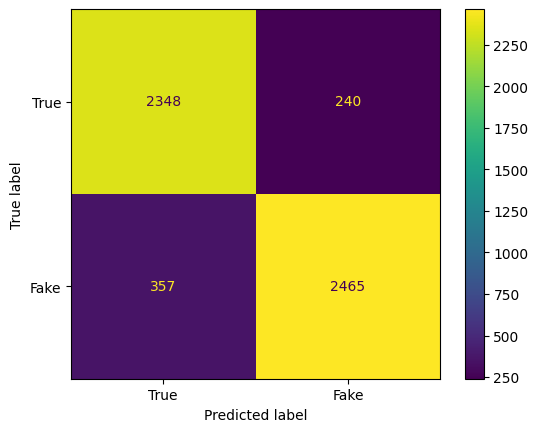

In [47]:
cm_display = ConfusionMatrixDisplay(cm_1, display_labels = ["True", "Fake"])

cm_display.plot()
plt.show()

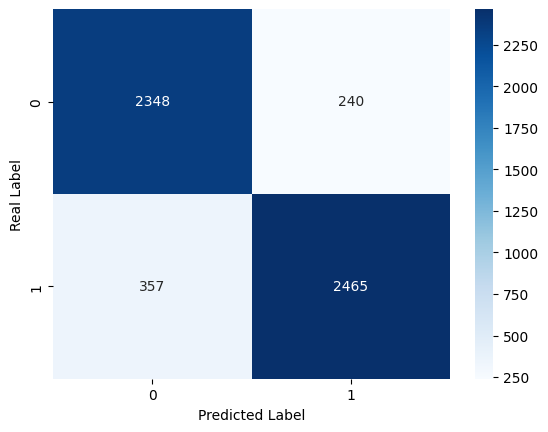

In [48]:
sns.heatmap(cm_1, annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Real Label')
#plt.figure(figsize = (8,6))
plt.show()

In [49]:
#pip install liblinear-official

## Decision Tree

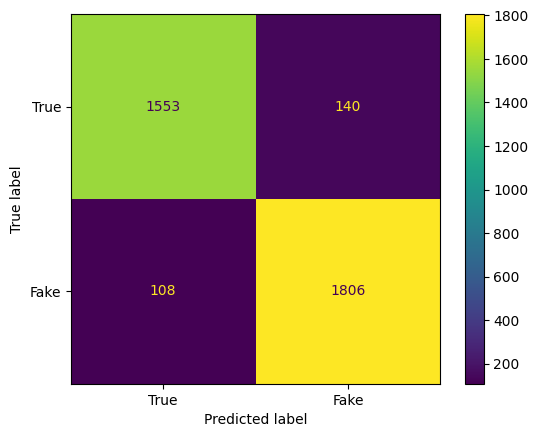

Accuracy: 0.9312448017743277
Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.92      0.93      1693
        Real       0.93      0.94      0.94      1914

    accuracy                           0.93      3607
   macro avg       0.93      0.93      0.93      3607
weighted avg       0.93      0.93      0.93      3607



In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with 'title', 'text', and 'label' attributes
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Vectorize 'title' usingT
tfidf_vectorizer_title = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X_train_title = tfidf_vectorizer_title.fit_transform(train_df['title'])
X_test_title = tfidf_vectorizer_title.transform(test_df['title'])

# Vectorize 'text' using TF-IDF
tfidf_vectorizer_text = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X_train_text = tfidf_vectorizer_text.fit_transform(train_df['text'])
X_test_text = tfidf_vectorizer_text.transform(test_df['text'])

# Convert the sparse matrices to DataFrames
X_train_title_df = pd.DataFrame(X_train_title.toarray(), columns=tfidf_vectorizer_title.get_feature_names_out())
X_train_text_df = pd.DataFrame(X_train_text.toarray(), columns=tfidf_vectorizer_text.get_feature_names_out())

# Combine the features from 'title' and 'text'
X_train = pd.concat([X_train_title_df, X_train_text_df.add_suffix('_text')], axis=1)

X_test_title_df = pd.DataFrame(X_test_title.toarray(), columns=tfidf_vectorizer_title.get_feature_names_out())
X_test_text_df = pd.DataFrame(X_test_text.toarray(), columns=tfidf_vectorizer_text.get_feature_names_out())

# Combine the features from 'title' and 'text'
X_test = pd.concat([X_test_title_df, X_test_text_df.add_suffix('_text')], axis=1)

y_train = train_df['label']
y_test = test_df['label']

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels = ["True", "Fake"])
cm_display.plot()
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')


In [51]:
reps = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
reps.T

,precision,recall,f1-score,support
Fake,0.934979,0.917307,0.926058,1693.000000
Real,0.928058,0.943574,0.935751,1914.000000
accuracy,0.931245,0.931245,0.931245,0.931245
macro avg,0.931518,0.930440,0.930905,3607.000000
weighted avg,0.931306,0.931245,0.931202,3607.000000


## SVM

C:\Users\Rabinam\ml\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


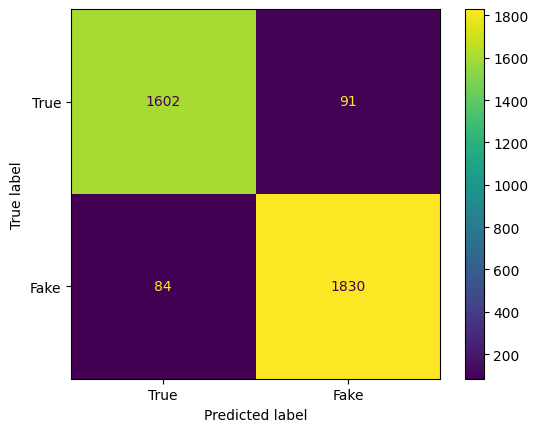

Accuracy: 0.9514832270584974
Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.95      0.95      1693
        Real       0.95      0.96      0.95      1914

    accuracy                           0.95      3607
   macro avg       0.95      0.95      0.95      3607
weighted avg       0.95      0.95      0.95      3607



In [52]:
from sklearn.svm import LinearSVC

# Train a SVM classifier
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confs_matrix = confusion_matrix(y_test, y_pred)
classes_report = classification_report(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confs_matrix, display_labels = ["True", "Fake"])
cm_display.plot()
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classes_report}')


In [53]:
repss = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
repss.T

,precision,recall,f1-score,support
Fake,0.950178,0.946249,0.948210,1693.000000
Real,0.952629,0.956113,0.954368,1914.000000
accuracy,0.951483,0.951483,0.951483,0.951483
macro avg,0.951403,0.951181,0.951289,3607.000000
weighted avg,0.951478,0.951483,0.951477,3607.000000


## ANN 

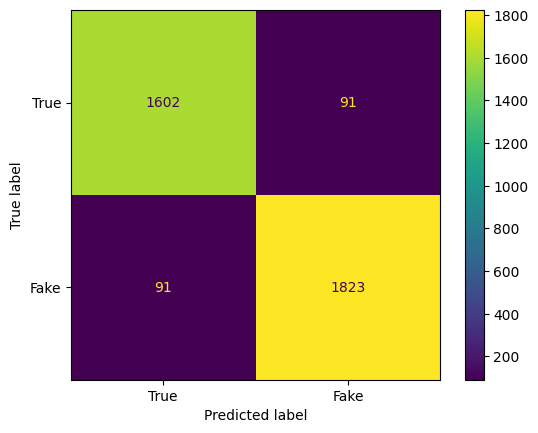

Accuracy: 0.9495425561408373
Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.95      0.95      1693
        Real       0.95      0.95      0.95      1914

    accuracy                           0.95      3607
   macro avg       0.95      0.95      0.95      3607
weighted avg       0.95      0.95      0.95      3607



In [54]:
from sklearn.neural_network import MLPClassifier

# Train an ANN classifier
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confs_matrix = confusion_matrix(y_test, y_pred)
classes_report = classification_report(y_test, y_pred)

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confs_matrix, display_labels = ["True", "Fake"])
cm_display.plot()
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classes_report}')


In [55]:
repsss = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
repsss.T

,precision,recall,f1-score,support
Fake,0.946249,0.946249,0.946249,1693.000000
Real,0.952456,0.952456,0.952456,1914.000000
accuracy,0.949543,0.949543,0.949543,0.949543
macro avg,0.949352,0.949352,0.949352,3607.000000
weighted avg,0.949543,0.949543,0.949543,3607.000000


## LogisticRegression

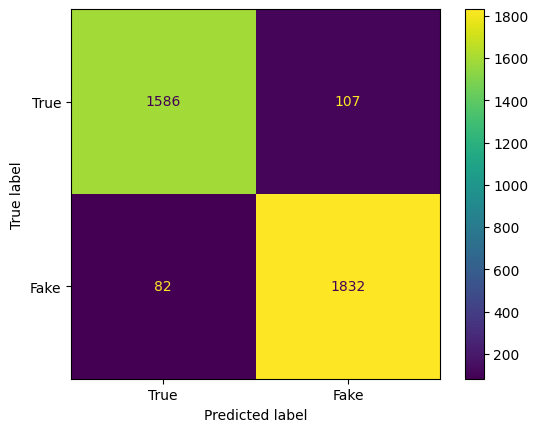

Accuracy: 0.9476018852231771
Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.94      0.94      1693
        Real       0.94      0.96      0.95      1914

    accuracy                           0.95      3607
   macro avg       0.95      0.95      0.95      3607
weighted avg       0.95      0.95      0.95      3607



In [56]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confs_matrix = confusion_matrix(y_test, y_pred)
classes_report = classification_report(y_test, y_pred)

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confs_matrix, display_labels = ["True", "Fake"])
cm_display.plot()
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classes_report}')


In [57]:
repsssss = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
repsssss.T

,precision,recall,f1-score,support
Fake,0.950839,0.936799,0.943767,1693.000000
Real,0.944817,0.957158,0.950947,1914.000000
accuracy,0.947602,0.947602,0.947602,0.947602
macro avg,0.947828,0.946978,0.947357,3607.000000
weighted avg,0.947644,0.947602,0.947577,3607.000000
